# 월평균 초임 임금에 따른 청년의 퇴사율
- 임금 수준이 낮은 청년 근로자일수록 1년 미만 퇴사율이 높은가?
<br>
- 목적 : 청년 임금 근로자 중, 평균 임금 이하에 해당하는 비율이 높을수록 1년 미만 근속자 비율(조기퇴사율)도 높아지는가?를 확인


#### 🎈변수 정의
| 변수         | 설명                                           |
| ---------- | -------------------------------------------- |
| **저임금 비율** | 평균 임금 이하 근무자 비율(`해당 연도 평균임금 이하 구간의 인원 수 / 전체 청년 근무자 수`)      |
| **조기퇴사율**  | 1년 미만 근속자의 비율 (`1년 미만 근속자 수 / 전체 근로자 수`) |


In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

## ✍저임금 비율
+ 경제활동 인구 中 실업자 : 퇴사율
+ 평균 임금 이하의 근로자 : 임금 수준이 낮은 청년 근로자


- 각 연도별로 평균임금 이하 구간에 속하는 청년 근로자의 비율
- (평균이하인원/전체인원)


In [2]:
a = pd.read_csv("data/평균이하비율.csv", encoding='euc-kr')

# 리스트
years = a['연도']
salarym = a['평균 임금(만원)']
# 리스트를 딕셔너리로 변환
salary_mean_dict = dict(zip(years, salarym))
print(salary_mean_dict)

{2016: 183.1, 2017: 198.89, 2018: 207.17, 2019: 226.3, 2020: 222.37, 2021: 230.43, 2022: 235.95, 2023: 243.59, 2024: 250.1}


### 🎨시각화

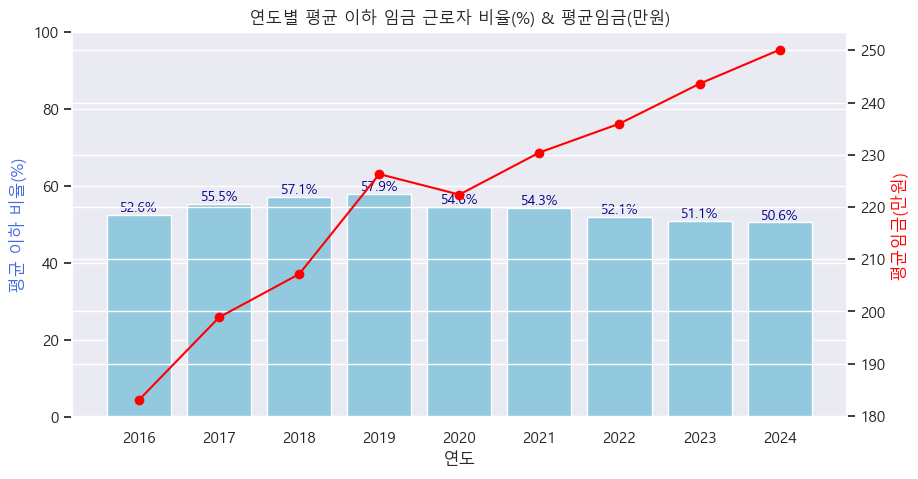

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# 평균 이하 비율(막대)
bar = sns.barplot(data=a, x='연도', y='평균 이하 비율', color='skyblue', ax=ax1)
ax1.set_ylabel('평균 이하 비율(%)', color='royalblue')
ax1.set_ylim(0, 100)

# 막대 위에 값 표시
for p in bar.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.1f}%', 
                 (p.get_x() + p.get_width() / 2, height), 
                 ha='center', va='bottom', fontsize=10, color='darkblue')

# 평균임금(선, 보조축)
years = [str(y) for y in salary_mean_dict.keys()]
salary_means = list(salary_mean_dict.values())
ax2 = ax1.twinx()
ax2.plot(years, salary_means, color='red', marker='o', label='평균임금')
ax2.set_ylabel('평균임금(만원)', color='red')

plt.title('연도별 평균 이하 임금 근로자 비율(%) & 평균임금(만원)')
plt.show()

In [4]:
cgs = pd.read_excel("data/초과근무시간.xlsx")

In [5]:
from scipy.stats import pearsonr

x = cgs['월간 근로시간(h)']
y = cgs['퇴사율(%)']

corr_coef1, p_value1 = pearsonr(x, y)
print(f"피어슨 상관계수: {corr_coef1:.4f}")
print(f"p-value: {p_value1:.4f}")

피어슨 상관계수: 0.6478
p-value: 0.0428


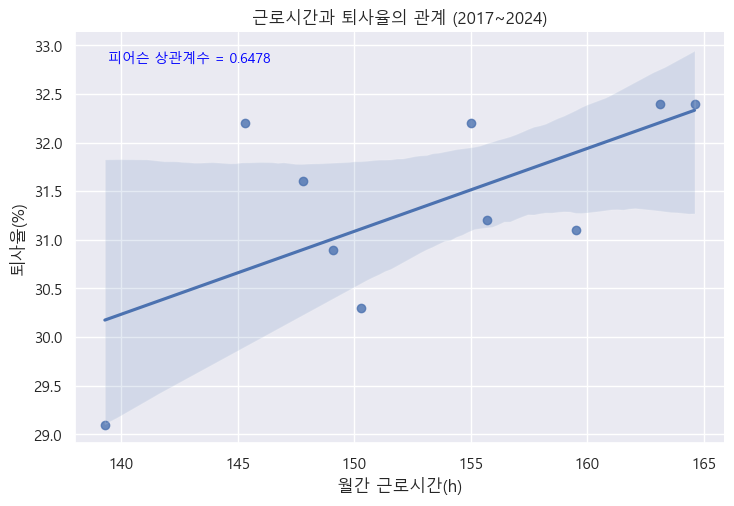

In [ ]:
# lmplot으로 산점도+회귀선
sns.lmplot(data=cgs, x='월간 근로시간(h)', y='퇴사율(%)',height=5, aspect=1.5)

# lmplot은 figure가 따로 생성되므로 plt.gca()로 축을 얻어야 함
plt.gca().text(
    0.05, 0.95, 
    f"피어슨 상관계수 = {corr_coef1:.4f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    color='blue'
)

plt.title('근로시간과 퇴사율의 관계 (2017~2024)')
plt.show()

In [7]:
bdf = pd.read_csv("data/평균이하비율.csv", encoding='cp949')

In [8]:
x = bdf['평균 이하 비율']
y = bdf['퇴사율']

corr_coef2, p_value2 = pearsonr(x, y)
print(f"피어슨 상관계수: {corr_coef2:.4f}")
print(f"p-value: {p_value2:.4f}")

피어슨 상관계수: 0.4798
p-value: 0.1912


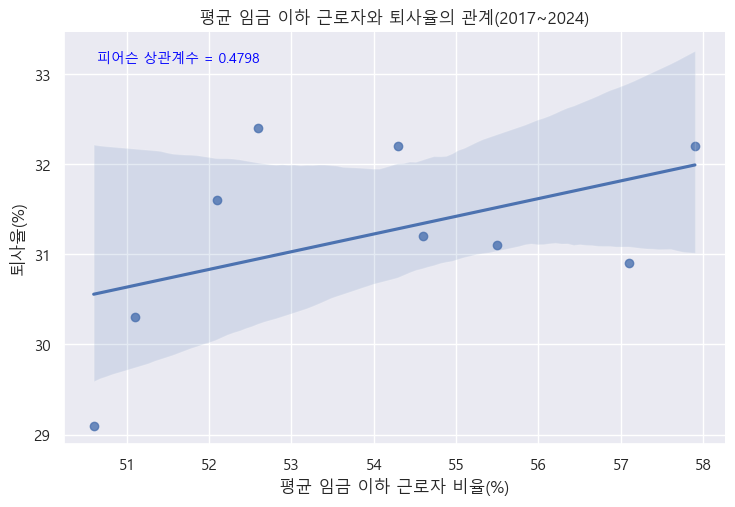

In [9]:
sns.lmplot(data=bdf, x='평균 이하 비율', y='퇴사율',height=5, aspect=1.5)

plt.xlabel('평균 임금 이하 근로자 비율(%)')
plt.ylabel('퇴사율(%)')
# lmplot은 figure가 따로 생성되므로 plt.gca()로 축을 얻어야 함
plt.gca().text(
    0.05, 0.95, 
    f"피어슨 상관계수 = {corr_coef2:.4f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    color='blue'
)

plt.title('평균 임금 이하 근로자와 퇴사율의 관계(2017~2024)')
plt.show()
